#### Case 1: Wisconsin Breast Cancer Dataset

The Wisconsin Breast Cancer Data Set is a well-known dataset widely used in machine learning and data mining research. It contains information about breast cancer tumors and their characteristics, primarily used for the classification of tumors as either benign or malignant.


##### I. Introduction

a. Brief overview of the Wisconsin Breast Cancer Data Set

- The dataset contains 569 instances, 212 of which are malignant and 357 of which are benign.

b. Importance of breast cancer diagnosis and prediction

- The early diagnosis of breast cancer is of important as we can treat the cancer more effectively if it is detected at an early stage.


##### II. Background Information

a. Explanation of the Wisconsin Breast Cancer Data Set

- The dataset contains information about breast cancer tumors and their characteristics, primarily used for the classification of tumors as either benign or malignant.

b. Description of the attributes and features in dataset

- The dataset contains 32 attributes, 30 of which are real-valued and 2 of which are integers. The attributes are as follows:

  - `radius`: mean of distances from center to points on the perimeter
  - `texture`: standard deviation of gray-scale values
  - `perimeter`: perimeter of tumor
  - `area`: area of tumor
  - `smoothness`: local variation in radius lengths
  - `compactness`: perimeter^2 / area - 1.0
  - `concavity`: severity of concave portions of the contour
  - `concave points`: number of concave portions of the contour
  - `symmetry`: symmetry of tumor
  - `fractal dimension`: "coastline approximation" - 1
  
c. Significance of the data set in breast cancer research

- The dataset is widely used in machine learning and data mining research. It is used to predict whether a tumor is benign or malignant based on the features of the tumor.

##### III. Data Preprocessing

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

##### a. Data cleaning and handling missing values, if applicable

In [55]:
# Load the data
df = pd.read_csv('../../datasets/breast_cancer_dataset.csv', index_col=0)
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [56]:
# Convert the diagnosis column to a binary variable
df['y'] = df['y'].map({'M':1, 'B':0})

In [57]:
# Check if there are any null values
df.isnull().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

##### b. Exploratory data analysis to understand the distribution of features.

In [58]:
df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


##### c. Feature selection or dimensionality reduction techniques, if needed

In [59]:
# Create a list of the features to be used in the model
features = ['x.texture_mean', 'x.perimeter_mean', 'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean']

# Create the X and y variables
X = df[features]
y = df['y']

##### IV. Data Analysis

##### a. Descriptive statistics of dataset

##### b. Visualization of the data to identify patterns and correlations.

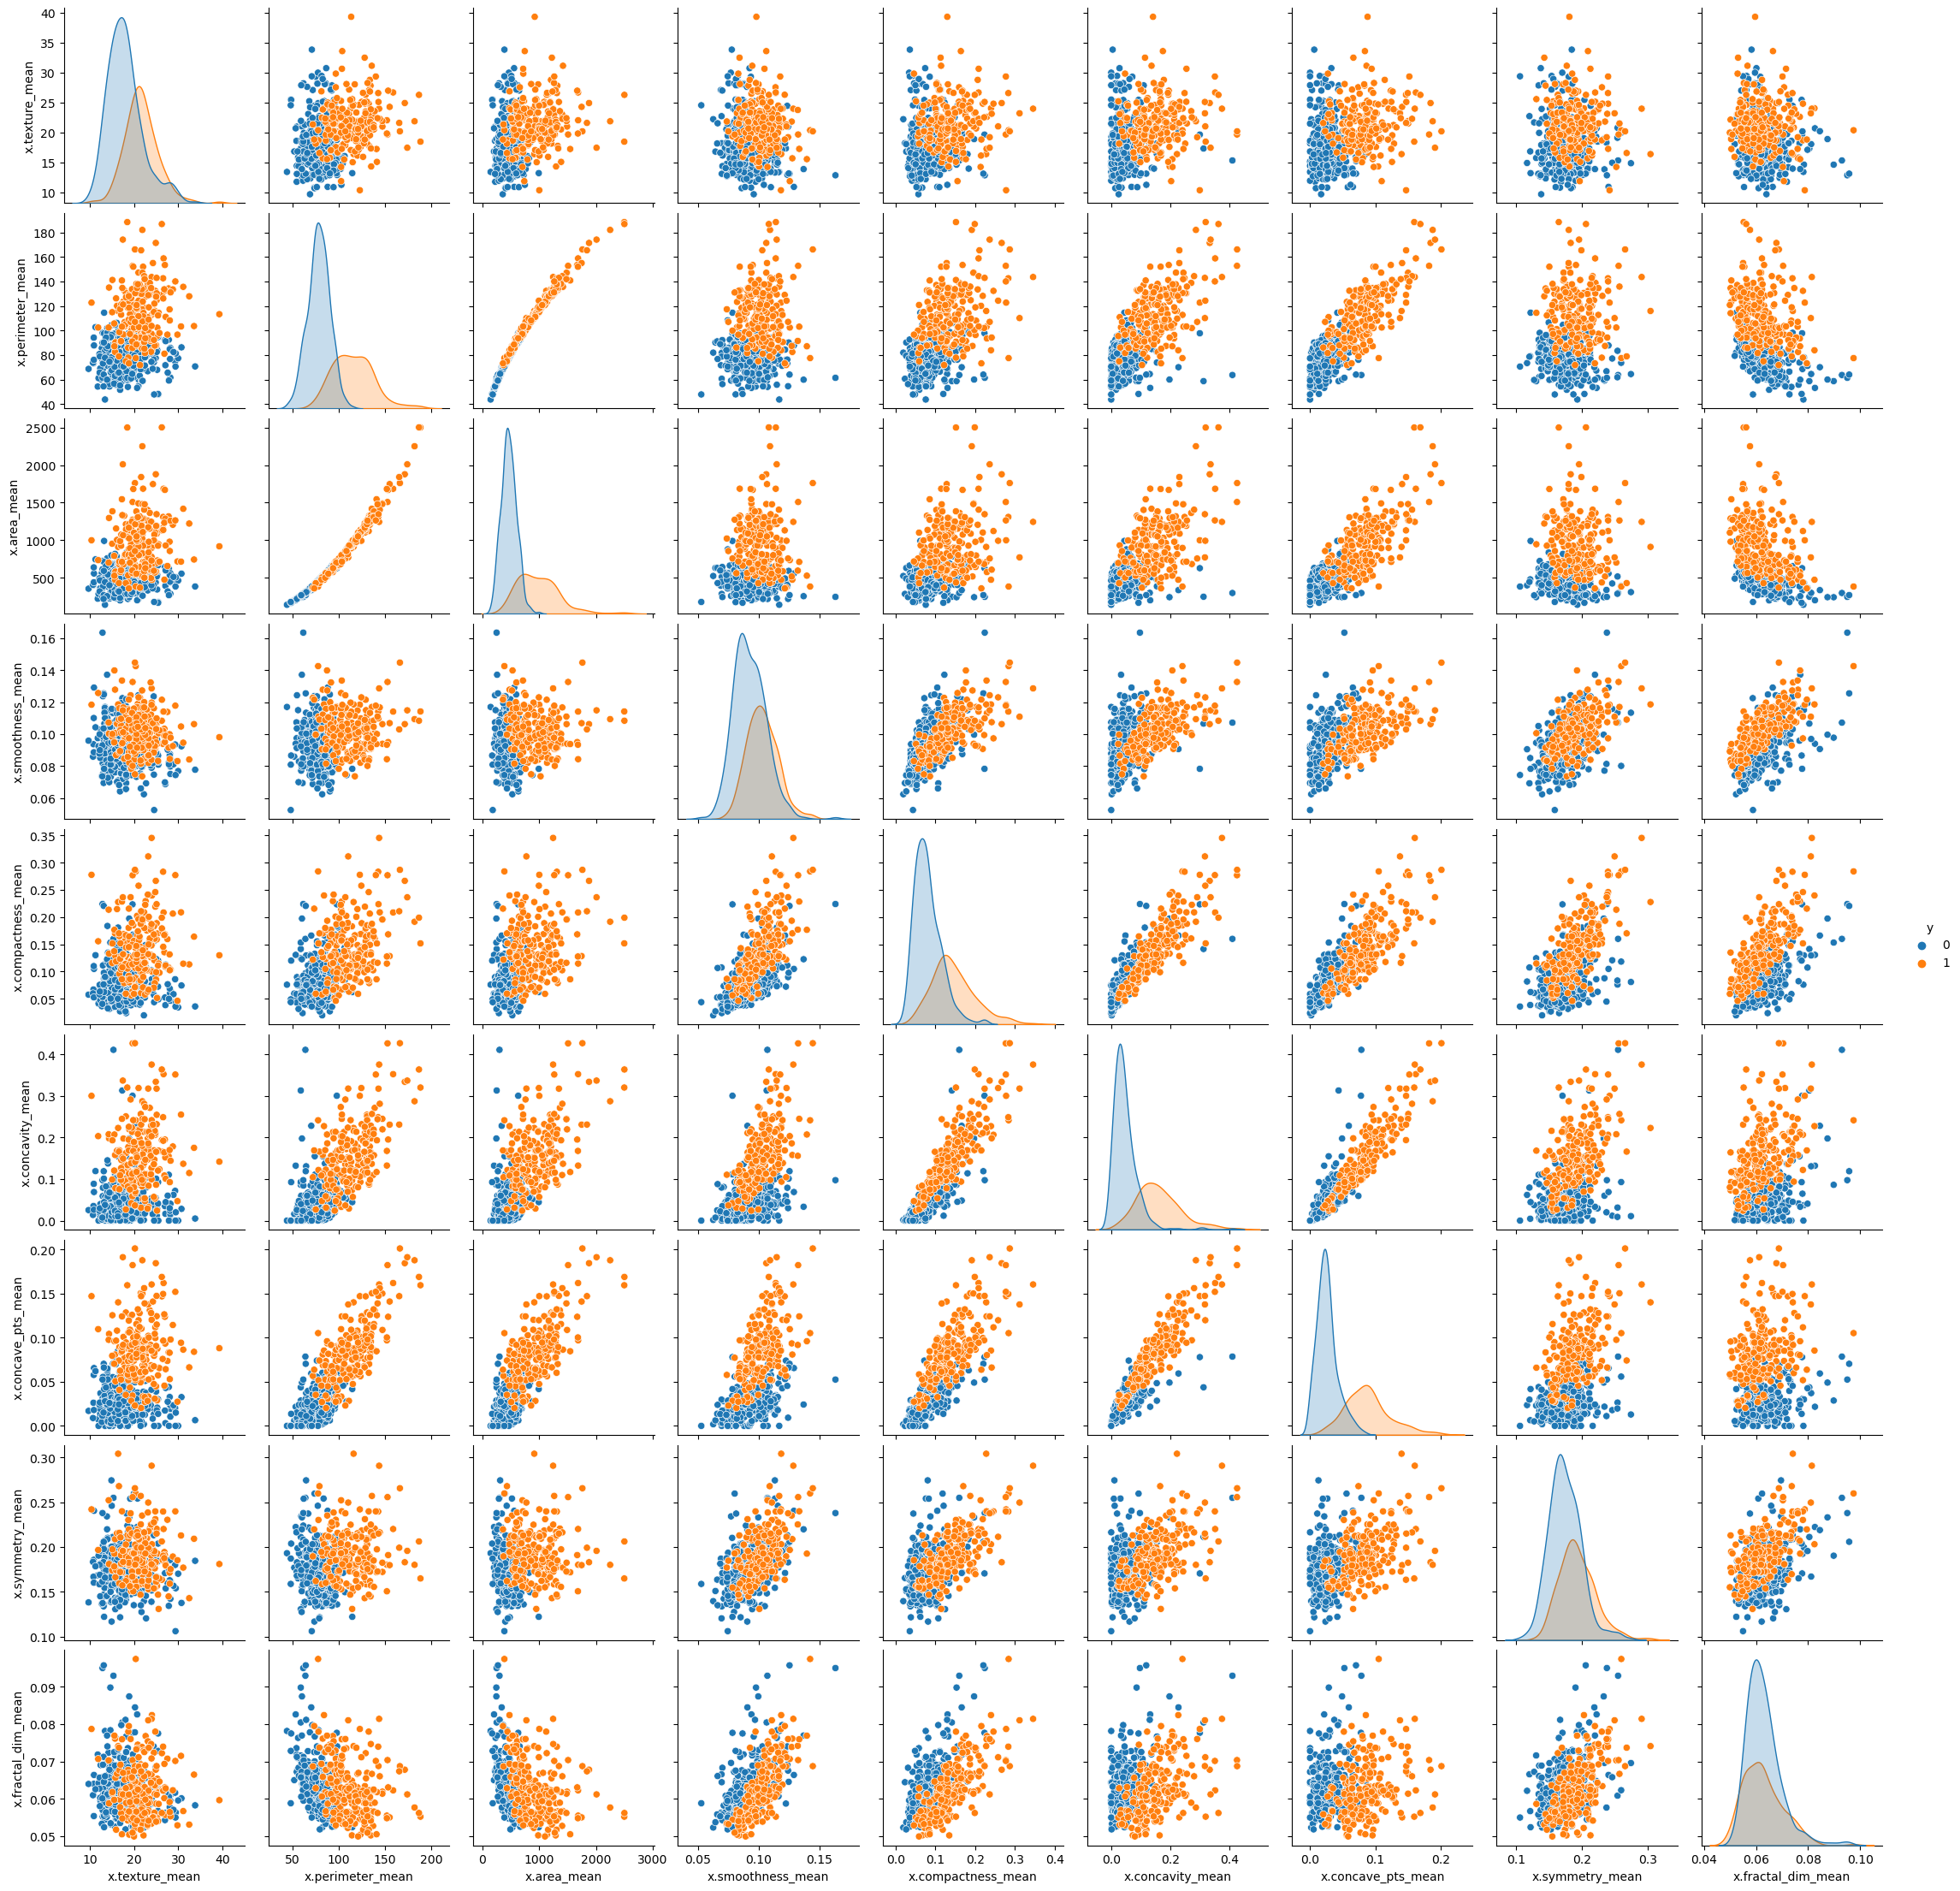

In [60]:
# Create a scatter plot matrix
sns.pairplot(df, hue='y', vars=[ 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean'])
plt.show()

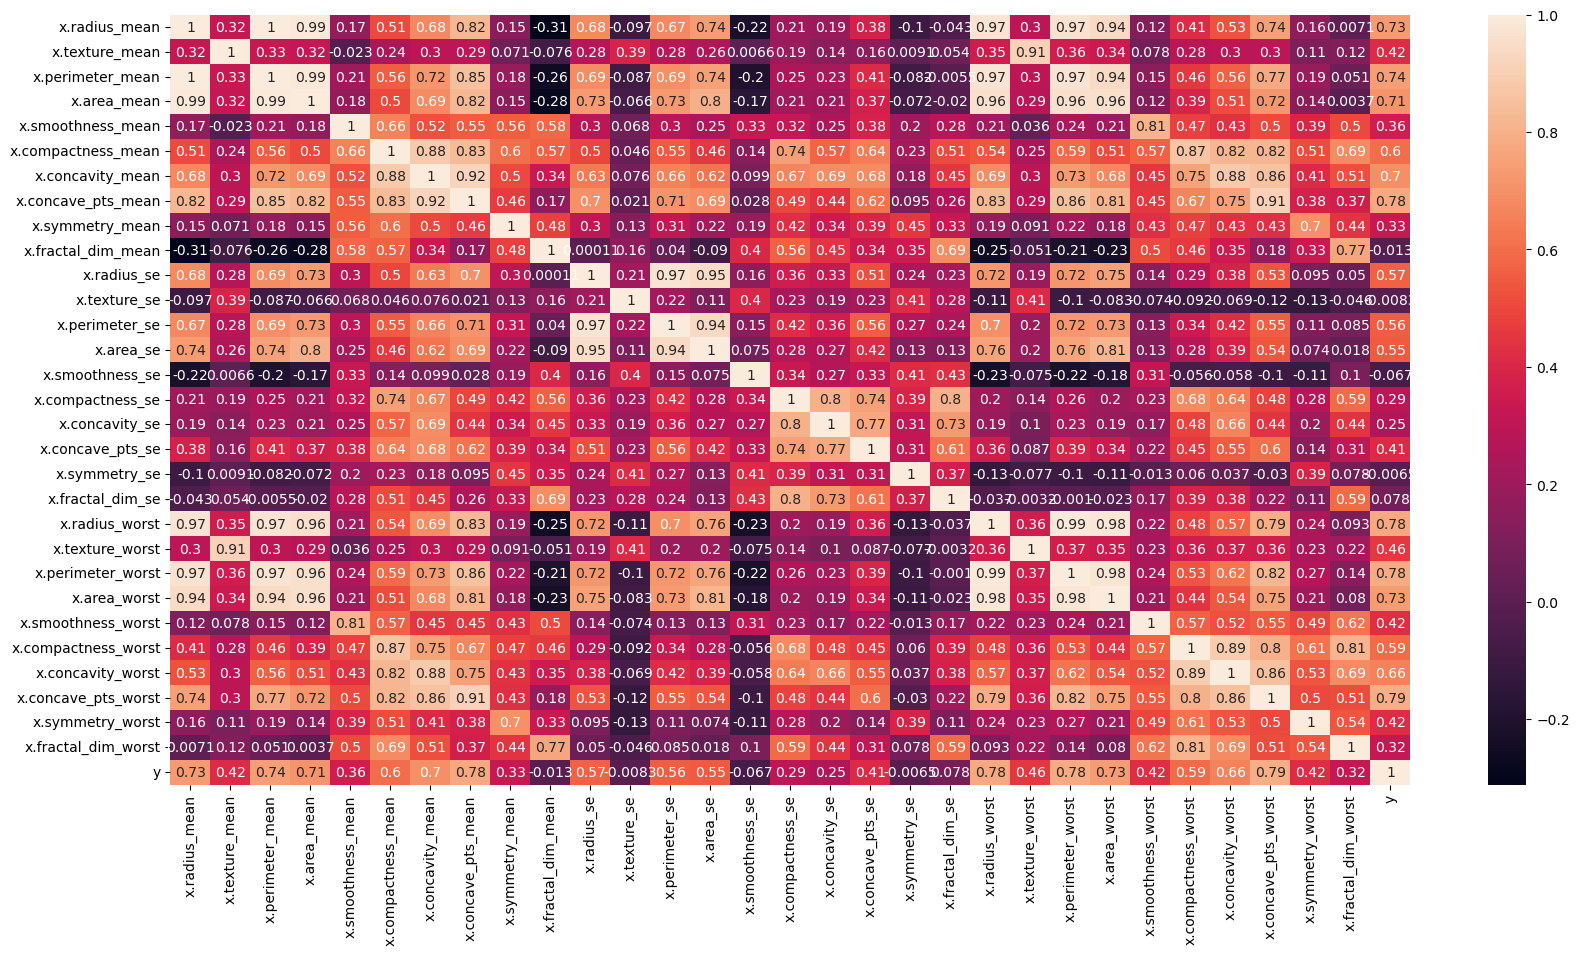

In [61]:
# Create a correlation heatmap to check for multicollinearity
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

##### c. Application of classification algorithms to predict breast cancer diagnosis.

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

##### V. Model Evaluation

##### a. Evaluation metrics for binary classification (e.g., accuracy, precision, recall, F1 score)

In [66]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print('Classification Report: ', report)

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.91      0.91       115
           1       0.82      0.80      0.81        56

    accuracy                           0.88       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.88      0.88      0.88       171



##### b. Cross-validation techniques to assess model performance.

In [73]:
# Use cross validation to evaluate the model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5,)

print('Cross Validation Scores: ', scores)
print('Mean Cross Validation Score: ', scores.mean())

Cross Validation Scores:  [0.86842105 0.89473684 0.92105263 0.93859649 0.88495575]
Mean Cross Validation Score:  0.9015525539512499


##### VI. Interpretation of Results

##### a. Analysis of the most influential features in breast cancer prediction

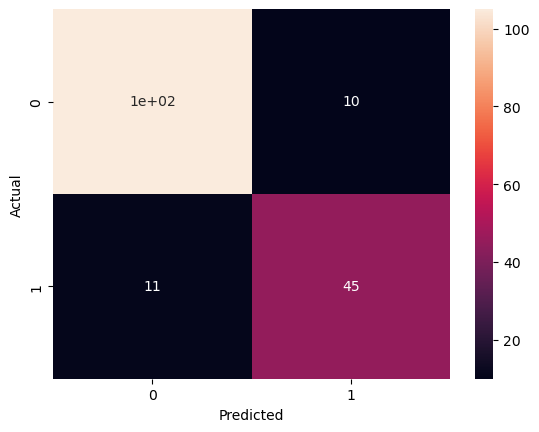

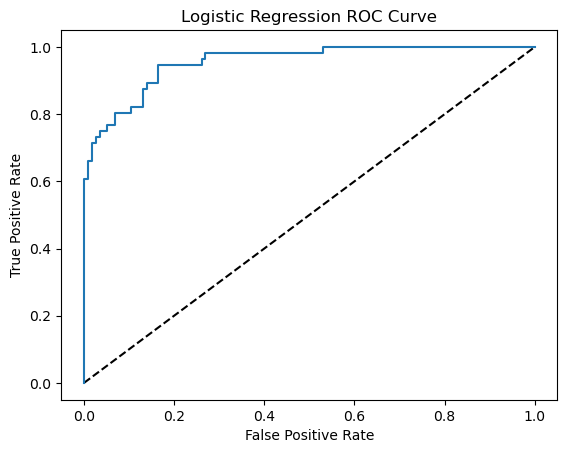

In [72]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a ROC curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


##### b. Insightful findings and observations from the models

- The model was able to predict the diagnosis of breast cancer with high accuracy.

##### c. Discussion of the clinical implications and potential applications

- The clinical implications of the model are that it can be used to predict whether a tumor is benign or malignant based on the features of the tumor. This can be used to help doctors diagnose breast cancer.

##### VII. Limitations and Future Directions

##### a. Addressing limitations of the study and the dataset

- The dataset is limited in that it only contains information about breast cancer tumors and their characteristics, and does not contain information about other types of tumors.

##### b. Suggestions for further research and improvements

- Further research could be done to identify other features that may be useful in predicting breast cancer diagnosis.

##### c. Possible extensions of the analysis to explore additional aspects.

- The analysis could be extended to explore additional aspects such as the relationship between the features and the diagnosis of breast cancer.

##### VIII. Conclusion

##### a. Summary of the case study

- The case study was about analyzing the different features of breast cancer tumors and using machine learning to predict whether a tumor is benign or malignant.

##### b. Key takeaways and contributions to the field of breast cancer research

- The overall key takeaways and contributions to the field of breast cancer research are that machine learning can be used to predict whether a tumor is benign or malignant based on the features of the tumor, which can help doctors diagnose breast cancer. Hopefully, we can also utilize machine learning to predict the severity of the tumor and the likelihood of the tumor spreading to other parts of the body.